In [3]:
import sys
import pandas as pd
from sqlalchemy import create_engine


def load_data(messages_filepath, categories_filepath):
    '''
    Load and merges the 2 given files and returns them as 1 pandas dataframe object

            Parameters:
                    messages_filepath (str): filepath to messsages csv
                    categories_filepath (str): filepath to categories csv

            Returns:
                    df_merged (object): loaded files merged into one dataframe
    '''
    
    df_messages = pd.read_csv("disaster_messages.csv")
    df_categories = pd.read_csv("disaster_categories.csv")
    
    df_merged = pd.merge(df_messages, df_categories, on="id")
    
 
    
    return df_merged


def clean_data(df):
    '''
    Cleans the merged dataframe from load_data()

            Parameters:
                    df (object): uncleanded data as dataframe 
                    

            Returns:
                    df_cleaned (object): cleaned data as dataframe
    '''
    
    #create a new dataframe with a column for each categorie
    df_categories = pd.DataFrame(df["categories"].str.split(';', expand=True).values,
                 columns=[df["categories"].str.split(';')[0]])

    #reset multilevel index by changing columns list so single level index
    df_categories.columns = df["categories"].str.split(';')[0]

    #only keeping 0 or 1 from values and 
    for column in df_categories.columns:
        df_categories[column] = df_categories[column].str[-1:]

    #correct column names
    temp_col_name_list = []
    for col_name in df_categories.columns:
        temp_col_name_list.append(col_name[:-2])

    df_categories.columns = temp_col_name_list
   

    #concat both dataframes to get a single one with full informatio
    df = pd.concat([df, df_categories], axis=1)
    
    #drop all rows where related is 2
    df.drop(df[df["related"] == "2"].index, inplace=True)

    #drop categories column
    df_cleaned = df.drop(columns=["categories"])
    
    #drop duplicate cols
    df_cleaned = df_cleaned.drop_duplicates()
    
    

    return df_cleaned


def save_data(df, database_filename):
    '''
    Takes data as dataframe and stores it into a database at a given location

            Parameters:
                    df (object): data as dataframe 
                    database_filename (str): name of the database, where the df will be saved in
                    

            Returns:
                    None
    '''
    
    engine = create_engine('sqlite:///' + database_filename, echo=True)
    sqlite_connection = engine.connect()
    
    df.to_sql("disaster_respone", sqlite_connection, if_exists='replace')
    return  


In [4]:
messages_filepath, categories_filepath, database_filepath = "disaster_messages.csv", "disaster_categories.csv", "DisasterResponse.db"

print('Loading data...\n    MESSAGES: {}\n    CATEGORIES: {}'
      .format(messages_filepath, categories_filepath))
df = load_data(messages_filepath, categories_filepath)

print('Cleaning data...')
df = clean_data(df)

print('Saving data...\n    DATABASE: {}'.format(database_filepath))
save_data(df, database_filepath)

print('Cleaned data saved to database!')



Loading data...
    MESSAGES: disaster_messages.csv
    CATEGORIES: disaster_categories.csv
Cleaning data...
Saving data...
    DATABASE: DisasterResponse.db
2021-03-26 15:32:20,200 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-03-26 15:32:20,202 INFO sqlalchemy.engine.base.Engine ()
2021-03-26 15:32:20,204 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-03-26 15:32:20,205 INFO sqlalchemy.engine.base.Engine ()
2021-03-26 15:32:20,312 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("disaster_respone")
2021-03-26 15:32:20,313 INFO sqlalchemy.engine.base.Engine ()
2021-03-26 15:32:20,316 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("disaster_respone")
2021-03-26 15:32:20,318 INFO sqlalchemy.engine.base.Engine ()
2021-03-26 15:32:20,327 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2021-03-26 15:32:20,329 INFO 

2021-03-26 15:32:22,306 INFO sqlalchemy.engine.base.Engine COMMIT
Cleaned data saved to database!


In [13]:
df_messages = pd.read_csv("disaster_messages.csv")
df_categories = pd.read_csv("disaster_categories.csv")

In [133]:
df_categories.head()

,id,categories
0,2,related-1;request-0;offer-0;aid_related-0;medi...
1,7,related-1;request-0;offer-0;aid_related-1;medi...
2,8,related-1;request-0;offer-0;aid_related-0;medi...
3,9,related-1;request-1;offer-0;aid_related-1;medi...
4,12,related-1;request-0;offer-0;aid_related-0;medi...


In [5]:
df.iloc[:100,:]

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,122,We are about 500 people. We're in Martissant 2...,onn effectif la pou zonn nan men nou ka anviro...,direct,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
96,123,"Digicel let me go through, it's an emergency",D. igicel kitem pase se yon urgeence,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,124,Where can I find Capital Bank please?,ki adres nou ka jwenn kapital bank silvouple,direct,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,125,We are in Plaine du Cul-de-sac. Where's the ne...,Nou laplan di kildesak ki ba yap bay dlo ak ma...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
categories = df.iloc[:,4:].columns

In [11]:
import seaborn as sns

In [17]:
sum_of_categories_df = df.iloc[:,4:].astype(int).sum()
categories = sum_of_categories_df.keys()
values = sum_of_categories_df.values

In [18]:
values

array([19906,  4474,   118, 10860,  2084,  1313,   724,   471,   860,
           0,  1672,  2923,  2314,   405,   604,   298,   875,  1194,
        3446,  1705,  1201,  1333,   532,   159,   283,   120,   309,
        1151,  7297,  2155,  2443,   282,  2455,   530,  1376,  5075],
      dtype=int64)

<AxesSubplot:>

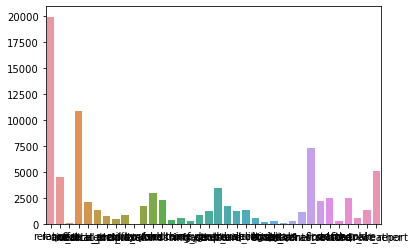

In [19]:
sns.barplot(x=categories, y=values)